1. What is deep learning, and how is it connected to artificial intelligence?
* Deep learning is a subset of **machine learning** that uses multi-layered neural networks to learn from large amounts of data. It is a key technique in artificial intelligence (AI) for tasks like image recognition, language processing, and more.


2. What is a neural network, and what are the different types of neural networks?
* A neural network is a machine learning model designed to recognize patterns by processing data through layers of interconnected nodes.

Types include feedforward (basic), CNN (images), RNN (sequences), LSTM (long-term memory), GAN (data generation), RBFN (classification), and modular networks (independent modules).


3. What is the mathematical structure of a neural network?
* The mathematical structure of a neural network consists of layers of neurons where each neuron computes a weighted sum of inputs, adds a bias, and applies an activation function:

Output = Activation(Σ(weight × input) + bias)

This process is repeated across multiple layers to learn complex patterns.


4.  What is an activation function, and why is it essential in neural network?
* An activation function introduces non-linearity into a neural network, allowing it to learn complex patterns.
It is essential because, without it, the network would behave like a simple linear model, no matter how many layers it has.


5.  Could you list some common activation functions used in neural networks?
*Common activation functions include:
1. ReLU (Rectified Linear Unit) – outputs zero for negative inputs, linear for positive
2. Sigmoid – squashes input between 0 and 1
3. Tanh – squashes input between -1 and 1
4. Softmax – converts outputs into probabilities (used in classification)
5. Leaky ReLU – allows a small gradient for negative inputs to avoid dead neurons


6. What is a multilayer neural network?
* A multilayer neural network, also known as a deep neural network, consists of an input layer, one or more hidden layers, and an output layer.
It can learn complex patterns by processing data through multiple layers of neurons with activation functions.


7. What is a loss function, and why is it crucial for neural network training?
*A loss function measures the difference between the predicted output and the actual target value.
It is crucial because it guides the neural network during training to adjust weights and minimize prediction errors.


8. What are some common types of loss functions?
* Common loss functions include:

1. Mean Squared Error (MSE) – used for regression, measures average squared difference
2. Cross-Entropy Loss – used for classification, measures difference between predicted and true probabilities
3. Hinge Loss – used for support vector machines and binary classification
4. Mean Absolute Error (MAE) – measures average absolute difference, less sensitive to outliers
5. Kullback-Leibler Divergence – measures how one probability distribution differs from another


9. How does a neural network learn?
* A neural network learns by adjusting its weights using training data to minimize the loss function, typically through a process called backpropagation combined with an optimization algorithm like gradient descent.


10. What is an optimizer in neural networks, and why is it necessary?
* An optimizer is an algorithm that adjusts the neural network’s weights to minimize the loss function during training.
It is necessary to efficiently find the best weights for accurate predictions and faster learning.


11. Could you briefly describe some common optimizers?
*
1. Gradient Descent – updates weights by moving in the direction of the negative gradient.
2. Stochastic Gradient Descent (SGD) – updates weights using one or a few training examples at a time for faster updates.
3. Adam – combines momentum and adaptive learning rates for efficient and robust training.
4. RMSprop – adapts learning rates based on recent gradients to improve convergence.
5. Momentum – accelerates SGD by considering past gradients to smooth updates.


12.  Can you explain forward and backward propagation in a neural network?
* Forward propagation passes input data through the network to produce an output prediction. Backward propagation calculates the error and updates the weights by propagating the loss gradient backward through the network.


13. What is weight initialization, and how does it impact training?
* Weight initialization is the process of setting the starting values of a neural network’s weights before training. Proper initialization helps the network converge faster and avoids issues like vanishing or exploding gradients.


14. What is the vanishing gradient problem in deep learning?
* The vanishing gradient problem occurs when gradients become extremely small during backpropagation, slowing or stopping learning in early layers of deep neural networks. This makes it hard for the network to update weights and learn effectively.


15. What is the exploding gradient problem?
* The exploding gradient problem happens when gradients become excessively large during backpropagation, causing unstable updates and making the training process diverge.



In [ ]:
#Question 1

import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return self.activation(linear_output)

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                self.weights += self.lr * error * xi
                self.bias += self.lr * error

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

for x in X:
    print(f"Input: {x}, Predicted: {perceptron.predict(x)}")


Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


In [1]:
#Question 2
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))  # hidden layer
model.add(Dense(1, activation='sigmoid'))  # output layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
#Question 3
## Keras uses Xavier initialization by default for layers.
## You can specify the initializer when creating a layer:

from keras.initializers import glorot_uniform

model.add(Dense(64, activation='relu', kernel_initializer=glorot_uniform(seed=42)))

In [3]:
#Question 4
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))  # ReLU activation
model.add(Dense(32, activation='tanh'))  # Tanh activation
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation

In [4]:
#Question 5
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))  # Dropout with 20% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Dropout with 20% dropout rate




In [5]:
#Question 6
import numpy as np

# Define the neural network architecture
input_size = 784
hidden_size = 64
output_size = 1

# Initialize weights and biases
weights1 = np.random.rand(input_size, hidden_size)
bias1 = np.zeros((1, hidden_size))
weights2 = np.random.rand(hidden_size, output_size)
bias2 = np.zeros((1, output_size))

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

# Forward propagation
def forward_propagation(inputs):
    hidden_layer = relu(np.dot(inputs, weights1) + bias1)
    output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)
    return output_layer

# Test the forward propagation
inputs = np.random.rand(1, input_size)
output = forward_propagation(inputs)
print(output)



[[1.]]


In [6]:
#Question 7
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8472 - loss: 0.5145 - val_accuracy: 0.9504 - val_loss: 0.1720
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9513 - loss: 0.1629 - val_accuracy: 0.9587 - val_loss: 0.1406
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9615 - loss: 0.1247 - val_accuracy: 0.9709 - val_loss: 0.0970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9671 - loss: 0.1058 - val_accuracy: 0.9684 - val_loss: 0.1022
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9718 - loss: 0.0911 - val_accuracy: 0.9712 - val_loss: 0.0965
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0819 - val_accuracy: 0.9710 - val_loss: 0.0927
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9775 - loss: 0.0733 - val_accuracy: 0.9717 - val_loss: 0.0948
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━

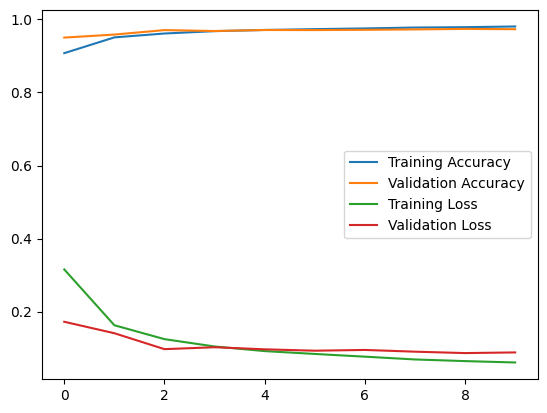

In [7]:
#Question 8
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras # Import the Keras API from TensorFlow

# Load a dataset (e.g., MNIST) - you will need to install tensorflow
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (flatten and normalize)
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

# Ensure the model architecture matches the input shape
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# Re-define the model to ensure it's built with the correct input shape if it wasn't defined previously
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax')) # Changed output layer for MNIST (10 classes)

# Compile the model with appropriate loss and metrics for multi-class classification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and save history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [8]:
#Question 9


from keras.optimizers import Adam

# Define the optimizer with gradient clipping
optimizer = Adam(clipnorm=1.0)  # Clip gradients to a maximum norm of 1.0
# optimizer = Adam(clipvalue=0.5)  # Clip gradients to a maximum value of 0.5

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [9]:
#Question 10

import keras.backend as K

def custom_loss(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true)) + 0.1 * K.mean(K.abs(y_pred - y_true))

model.compile(loss=custom_loss, optimizer='adam')

In [10]:
#Question 11
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)